# Exploratory Data Analysis

In [12]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, json, time
from tqdm.notebook import tqdm_notebook 

## Load Extracted Info as Dataframe

In [2]:
df_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df_2000.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN


In [3]:
df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
df_2001.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.325,1177.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN


In [4]:
# concatinate dataframes into a single dataframe
api_df = pd.concat([df_2000, df_2001], ignore_index=True)
api_df.info()
api_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529 entries, 0 to 2528
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2529 non-null   object 
 1   adult                  2527 non-null   float64
 2   backdrop_path          1352 non-null   object 
 3   belongs_to_collection  203 non-null    object 
 4   budget                 2527 non-null   float64
 5   genres                 2527 non-null   object 
 6   homepage               169 non-null    object 
 7   id                     2527 non-null   float64
 8   original_language      2527 non-null   object 
 9   original_title         2527 non-null   object 
 10  overview               2476 non-null   object 
 11  popularity             2527 non-null   float64
 12  poster_path            2268 non-null   object 
 13  production_companies   2527 non-null   object 
 14  production_countries   2527 non-null   object 
 15  rele

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.112,2135.0,PG


In [5]:
# save combined dataframe as single .csv.gz file
api_df.to_csv('Data/tmdb_results_combined.csv.gz', compression='gzip', index=False)

## Exploratory Data Analysis

### How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [6]:
# create filter to determine rows with valid financial info
valid_budget = api_df['budget'] > 0 
valid_revenue = api_df['revenue'] > 0

In [7]:
# create new dataframe with only valid financial info
valid_finance_df = api_df[valid_budget | valid_revenue]
print(f'Then number of movies with some valid financial info is {len(valid_finance_df)}.')

Then number of movies with some valid financial info is 632.


In [15]:
# determine total number of movies in the dataframe
total_movies = api_df.shape[0]

In [20]:
# Save percentage of movies with and without valid financial info
perc_valid_finance = len(valid_finance_df) / total_movies *100
perc_invalid_finance = 100 - perc_valid_finance

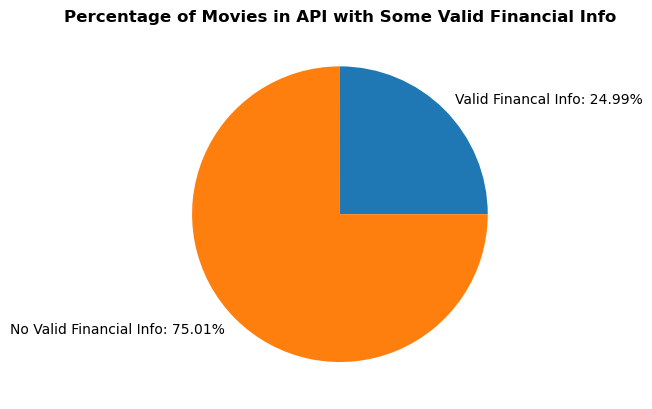

In [26]:
# Show percentages as a pi chart
percentages = np.array([perc_valid_finance, perc_invalid_finance])
labels = [f'Valid Financal Info: {round(perc_valid_finance,2)}%', 
          f'No Valid Financial Info: {round(perc_invalid_finance,2)}%']
plt.pie(percentages, labels = labels)
plt.title('Percentage of Movies in API with Some Valid Financial Info',
         fontweight = 'bold')
plt.show();

### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [33]:
# determine number of movies in each certification category
movie_certs = api_df['certification'].value_counts()
movie_certs

R          457
PG-13      183
NR          72
PG          63
G           24
NC-17        6
Unrated      1
-            1
Name: certification, dtype: int64

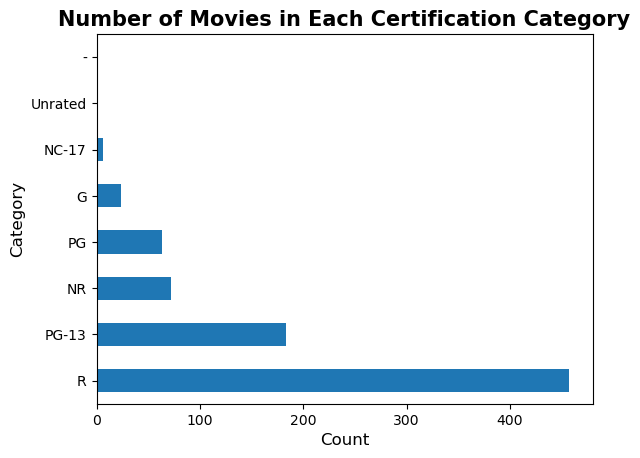

In [38]:
# Create barplot with data
movie_certs.plot(kind = 'barh')
plt.title('Number of Movies in Each Certification Category', fontsize=15,
         fontweight = 'bold')
plt.ylabel('Category', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show();

### What is the average revenue per certification category?

In [40]:
# determine mean revenue per certificaiton category
avg_revenue = api_df.groupby('certification')['revenue'].mean()
# set option to supress scientific notation
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
avg_revenue = avg_revenue.sort_values(ascending=False)
avg_revenue

certification
G         72,185,327.04
PG-13     71,057,113.56
PG        62,590,769.00
R         16,641,994.89
NR         2,263,992.56
-                  0.00
NC-17              0.00
Unrated            0.00
Name: revenue, dtype: float64

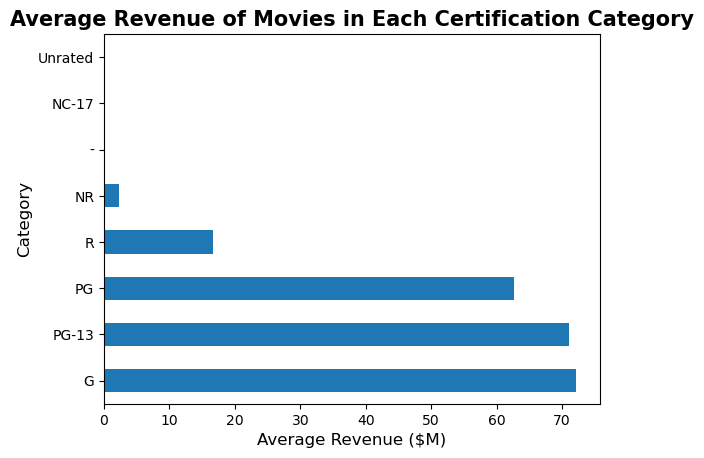

In [47]:
# save average revenue in value of millions
avg_revenue = avg_revenue / 1000000

# Create barplot with data
avg_revenue.plot(kind = 'barh')
plt.title('Average Revenue of Movies in Each Certification Category', fontsize=15,
         fontweight = 'bold')
plt.ylabel('Category', fontsize=12)
plt.xlabel('Average Revenue ($M)', fontsize=12)
plt.show();

### What is the average budget per certification category?

In [51]:
# determine mean budget per certificaiton category
avg_budget = api_df.groupby('certification')['budget'].mean()
# set option to supress scientific notation
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
avg_budget = avg_budget.sort_values(ascending=False)
avg_budget

certification
PG-13     30,787,748.23
PG        25,039,638.71
G         23,833,333.33
R          9,894,976.91
NR         1,488,056.86
-                  0.00
NC-17              0.00
Unrated            0.00
Name: budget, dtype: float64

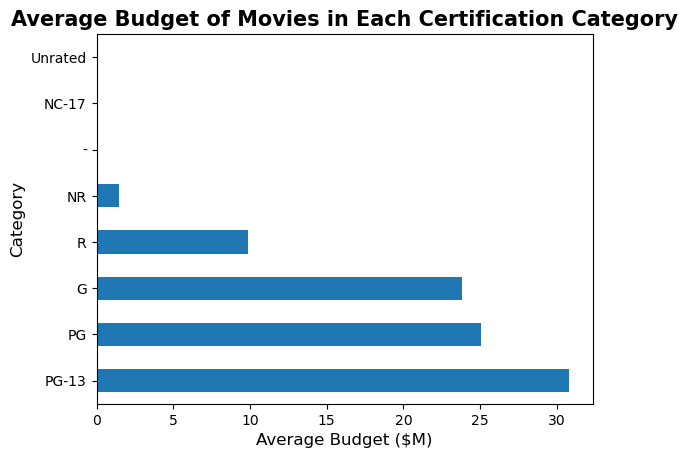

In [52]:
# save average budget in value of millions
avg_budget = avg_budget / 1000000

# Create barplot with data
avg_budget.plot(kind = 'barh')
plt.title('Average Budget of Movies in Each Certification Category', fontsize=15,
         fontweight = 'bold')
plt.ylabel('Category', fontsize=12)
plt.xlabel('Average Budget ($M)', fontsize=12)
plt.show();